In [ ]:
!pip install -q -U google-generativeai
# -q: Esta es una opción que significa "quiet" (silencioso). Reduce la cantidad de texto de salida que produce el comando, mostrando solo la información esencial.
# -U: Significa "upgrade" (actualizar). Esta opción le dice a pip que actualice el paquete especificado a la versión más reciente disponible.

In [ ]:
# Importamos el paquete recien instalado
import google.generativeai as genai

# Esto es para usar secrets, la nueva opción de Google Colab, para almacenar la API key
from google.colab import userdata

In [ ]:
import textwrap
from IPython.display import display
from IPython.display import Markdown

# Esta función se usa para dejar el formato Markdown que devuelve Gemini en formato compatible con Colab
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Configuramos nuestra instancia del modelo con nuestra API key
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key = GOOGLE_API_KEY)

In [ ]:
# Define una variable model, usando gemini-pro

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content("¿Qué es la Felicidad?")

# print(response.text)
to_markdown(response.text)

> La felicidad es un estado mental o emocional caracterizado por una sensación de alegría, bienestar y satisfacción. Es un sentimiento positivo que se asocia con una perspectiva optimista de la vida y con una sensación de plenitud y realización personal. La felicidad puede ser causada por una variedad de factores, como el éxito, el amor, la salud, la riqueza material o simplemente la sensación de estar en paz consigo mismo y con el mundo que lo rodea.
> 
> La felicidad es un concepto subjetivo y personal, y lo que hace feliz a una persona puede no hacer feliz a otra. Sin embargo, hay algunas cosas que se han demostrado que contribuyen a la felicidad, como tener relaciones sociales positivas, tener un propósito en la vida, mantenerse activo físicamente y tener una perspectiva positiva de la vida.
> 
> La felicidad es un estado mental que puede cultivarse y desarrollarse. Hay muchas cosas que las personas pueden hacer para aumentar su nivel de felicidad, como:
> 
> * Practicar la gratitud: Expresar gratitud por las cosas buenas de la vida puede ayudarnos a apreciar lo que tenemos y a sentirnos más felices.
> * Realizar actos de amabilidad: Ayudar a los demás puede hacernos sentir bien con nosotros mismos y aumentar nuestro nivel de felicidad.
> * Pasar tiempo con seres queridos: Las relaciones sociales positivas son importantes para la felicidad. Pasar tiempo con personas que queremos y que nos quieren puede ayudarnos a sentirnos felices y conectados con los demás.
> * Mantenerse activo físicamente: El ejercicio físico puede liberar sustancias químicas que nos hacen sentir bien, como la serotonina y la dopamina.
> * Tener una perspectiva positiva de la vida: Ver el vaso medio lleno en lugar de medio vacío puede ayudarnos a sentirnos más felices y a afrontar los retos de la vida con más optimismo.
> 
> La felicidad no es algo que se pueda lograr de la noche a la mañana, pero es algo que se puede cultivar y desarrollar con el tiempo y el esfuerzo. Al hacer cosas que sabemos que nos hacen felices, podemos aumentar nuestro nivel de felicidad y vivir una vida más plena y satisfactoria.

In [ ]:
# Usando Gemini Pro Vision
!curl -o image.jpg https://upload.wikimedia.org/wikipedia/commons/3/35/LibraCC.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43137  100 43137    0     0   241k      0 --:--:-- --:--:-- --:--:--  242k


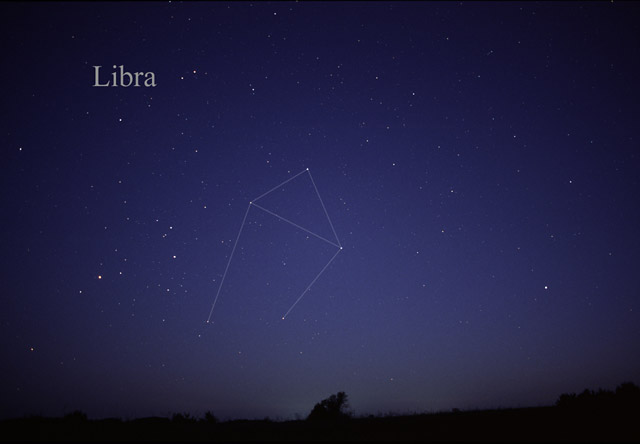

In [ ]:
import PIL.Image
# para gestionar las imagenes usamos Pillow. Si estás replicando este cuaderno en tu propio ambiente deberás instalar esta librería. Usa pip install Pillow

img = PIL.Image.open('image.jpg')
img

In [ ]:
## Cambiamos el modelo a Gemini Pro Vision
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)
to_markdown(response.text)

>  Libra is the seventh sign of the zodiac, and is represented by the scales. It is an air sign, and is ruled by the planet Venus. Libra is associated with the element of air, and is ruled by the planet Venus. People born under the sign of Libra are often said to be charming, diplomatic, and intelligent. They are also said to be fair-minded and justice-loving.
> 
> The constellation of Libra is located in the southern sky, and is one of the 12 zodiac constellations. It is a small constellation, and is not very bright. The brightest star in Libra is Alpha Librae, which is a red giant star.
> 
> Libra is a beautiful constellation, and is a great sight to see in the night sky. It is a reminder of the beauty of the universe, and of the many wonders that are out there to be discovered.

In [ ]:
response = model.generate_content([
    "¿que dice la imagen en letra blanca? ¿que puedes decirme del contenido de la imagen, puedes describirla?"
    , img], stream=True)
response.resolve()

to_markdown(response.text)

>  La imagen dice "Libra".
> 
> La imagen muestra la constelación de Libra. Libra es una de las doce constelaciones del zodíaco. Está situada en el hemisferio sur y es visible en los meses de marzo a septiembre. La constelación de Libra representa una balanza, que es el símbolo de la justicia.

In [ ]:
# Importamos las imagenes
!curl -o img1.jpg https://img.asmedia.epimg.net/resizer/GcSMJvnpyfa_fSOlLaYVyvwRlfE=/736x414/cloudfront-eu-central-1.images.arcpublishing.com/diarioas/L726G3JR35DGLG6JBDOS4MAPQ4.jpg
!curl -o img2.jpg https://www.latercera.com/resizer/bWBfOxvGtD_4x6Dq2OU-2bYIGMM=/900x600/smart/arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/JKAPSKC6PBDF3DCNV2YOQOFTL4.jpg

img1 = PIL.Image.open('img1.jpg')
img2 = PIL.Image.open('img2.jpg')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44044  100 44044    0     0  40836      0  0:00:01  0:00:01 --:--:-- 40857
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63653  100 63653    0     0   173k      0 --:--:-- --:--:-- --:--:--  173k


In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

response = model.generate_content([
    "¿Cuál es la relación entre ambas imagenes? Describe cada una y luego su relación"
    , img1, img2])
response.resolve()

to_markdown(response.text)

>  La primera imagen es de Goku, un personaje de la serie de anime y manga Dragon Ball. Es un Saiyan, una raza de guerreros extraterrestres, y el protagonista de la serie. Goku es un personaje amable y compasivo, pero también es un poderoso luchador.
> 
> La segunda imagen es de Vegeta, otro personaje de Dragon Ball. También es un Saiyan, y es el príncipe de la raza Saiyan. Vegeta es un personaje orgulloso y arrogante, pero también es un guerrero muy poderoso.
> 
> Goku y Vegeta son dos de los personajes más populares de Dragon Ball. Son amigos y rivales, y a menudo luchan entre sí para ver quién es el más fuerte. Sin embargo, también son leales el uno al otro, y siempre están dispuestos a luchar juntos para proteger a sus amigos y familiares.

In [ ]:
# Chateando con Gemini
# Cambiamos a Gemini Pro
model = genai.GenerativeModel('gemini-pro')

# Iniciamos el chat sin ninguna historia previa
chat = model.start_chat(history=[])

response = chat.send_message("Vivo en Chile. Describe brevemente mi país")
to_markdown(response.text)

> - Chile es un país largo y delgado ubicado en la costa oeste de América del Sur.
> - Tiene una superficie de 756.102 km².
> - Su capital es Santiago.
> - Su población es de aproximadamente 20 millones de habitantes.
> - El idioma oficial es el español.
> - La moneda oficial es el peso chileno.
> - Chile es un país con una economía abierta y un alto nivel de vida.
> - Es conocido por su producción de cobre, frutas y vino.
> - También es un destino turístico popular, con atracciones como el desierto de Atacama, la Patagonia y el Parque Nacional Torres del Paine.

In [ ]:
# Dado que ya conoce que mi país es Chile
# ahora preguntaré algo sin darle mucho contexto.
# Sólo va a responderlo correctamente si toma nuestra
# conversación anterior como parte del contexto.
response = chat.send_message("¿Quién es el presidente de mi país")
to_markdown(response.text)

# Nota: esto depende de la fecha en que estás viendo este ejercicio y la fecha de actualización de Gemini

> El presidente de Chile es **Gabriel Boric Font**. Fue elegido el 19 de diciembre de 2021 y asumió el cargo el 11 de marzo de 2022.
> 
> Boric es el presidente más joven en la historia de Chile, con 36 años al momento de su elección. Es miembro del partido Convergencia Social y se identifica como socialista democrático.
> 
> Su programa de gobierno se centra en la justicia social, la protección del medio ambiente y la lucha contra la corrupción. También ha propuesto una serie de reformas, como una nueva constitución, un sistema de salud universal y un sistema de pensiones más justo.
> 
> Boric ha enfrentado una serie de desafíos desde que asumió el cargo, incluida una pandemia global, una crisis económica y un conflicto social. Sin embargo, también ha logrado algunos avances, como la aprobación de una nueva ley de matrimonio igualitario y la creación de un nuevo Ministerio de la Mujer y la Equidad de Género.
> 
> Es demasiado pronto para decir cuál será el legado de Boric, pero está claro que es un líder joven y carismático con una visión ambiciosa para el futuro de Chile.

In [ ]:
# También puedes controlar más partes de la interacción.
# Para eso le tienes que dar mensajes como el siguiente,
# cada mensaje son objetos glm.Content que requieren role y parts.
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Describe brevemente el país de España."]}
]

response = model.generate_content(messages)

to_markdown(response.text)

> España es un país soberano, miembro de la Unión Europea, situado en la Península Ibérica. Limita al norte con Francia y Andorra, al este con el Mar Mediterráneo, al sur con el Océano Atlántico y Marruecos, y al oeste con Portugal y el Océano Atlántico.
> 
> España es el quinto país más grande de Europa en cuanto a superficie y el cuarto en cuanto a población. Tiene una población de más de 47 millones de habitantes y una superficie de más de 505.000 kilómetros cuadrados.
> 
> La capital de España es Madrid, que es también la ciudad más grande del país. Otras ciudades importantes son Barcelona, Valencia, Sevilla, Málaga y Bilbao.
> 
> España es un país desarrollado con una economía moderna y diversificada. Es miembro de la Organización para la Cooperación y el Desarrollo Económico (OCDE) y del G20.
> 
> España es un país con una rica historia y cultura. Es el hogar de algunos de los monumentos más famosos del mundo, como la Alhambra de Granada, el Museo del Prado de Madrid y la Sagrada Familia de Barcelona.
> 
> España es también un país con una gastronomía muy diversa y sabrosa. Es famosa por sus tapas, su paella y su gazpacho.
> 
> España es un país muy popular para los turistas. Es el segundo país más visitado del mundo, después de Francia. Los turistas vienen a España para disfrutar de su clima cálido, sus playas, su historia, su cultura y su gastronomía.

In [ ]:
model = genai.GenerativeModel('gemini-pro')

# creando contexto a la pregunta.
messages = [
    {'role': 'user',
     'parts': ['deseo obtener información de los examenes que debo realizarme']}
]

# dando la informacion que usara como contexto para responder.
messages.append({'role': 'model',
                 'parts': ['Los examenes que debe realizarse son: Examen físico: Clínica de Medicina Interna, Hospital Quilicura, 25 de enero de 2024. Análisis de sangre: Laboratorio, Hospital Quilicura, 26 de enero de 2024. Electrocardiograma (ECG): Servicio de Cardiología, Hospital Quilicura, 27 de enero de 2024. Radiografía de tórax: Servicio de Radiología, Hospital Quilicura, 28 de enero de 2024. Citología cervicovaginal: Centro de Salud Familiar, Quilicura, 29 de enero de 2024'
]})

# haciendo pregunta.
messages.append({'role': 'user',
                 'parts': ['¿Cuántos exámenes tengo programados?']})

# generando respuesta.
response = model.generate_content(messages)

# dando mas contexto.
messages.append({'role': 'model',
                 'parts': response.text})

messages.append({'role': 'user',
                 'parts': ['¿Cuál es mi examen mas proximo?']})

# generando respuesta.
response = model.generate_content(messages)

response = model.generate_content(messages)
to_markdown(response.text)





> Su examen más próximo es el **examen físico**, que se realizará el **25 de enero de 2024** en la Clínica de Medicina Interna del Hospital Quilicura.
> 
> Recuerde presentarse en el lugar y a la hora indicada con su cédula de identidad y los documentos necesarios para cada examen.

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

messages = [
    {'role':'user',
     'parts': ["Describa cada una de estas imagenes y la relación entre ellas", img1, img2]}
]

response = model.generate_content(messages)

to_markdown(response.text)

In [ ]:
# Al igual que en la API de OpenAI,
# podemos controlar parametros como la temperatura,
# el top_p, y el top_k. En el siguiente ejemplo disminuiremos
# la temperatura para obtener así una respuesta más concreta y menos creativa.
generation_config = {
  "temperature": 0.2, # a diferencia de OpenAI, este valor sólo puede llegar a un maximo de 1.0
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config)

response = model.generate_content("¿Cuál es el rol de un profesor?")
to_markdown(response.text)

2024-01-22 19:25:58.030 200 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 5969.78ms


> * **Educar:** El rol principal de un profesor es educar a los estudiantes. Esto incluye enseñarles el material del curso, ayudarles a desarrollar habilidades de pensamiento crítico y resolución de problemas, y prepararlos para el éxito en la vida.
> * **Motivar:** Los profesores también deben motivar a los estudiantes para que aprendan. Esto puede hacerse creando un ambiente de aprendizaje positivo, proporcionando retroalimentación constructiva y ayudando a los estudiantes a establecer metas y alcanzarlas.
> * **Evaluar:** Los profesores también deben evaluar el aprendizaje de los estudiantes. Esto puede hacerse a través de exámenes, tareas y otras formas de evaluación.
> * **Comunicarse:** Los profesores deben comunicarse eficazmente con los estudiantes, los padres y otros miembros del personal. Esto incluye ser capaz de explicar el material del curso de forma clara y concisa, y ser capaz de escuchar y responder a las preguntas de los estudiantes.
> * **Ser un modelo a seguir:** Los profesores también deben ser modelos a seguir para los estudiantes. Esto significa demostrar los valores que quieren que los estudiantes aprendan, como la honestidad, la integridad y el respeto.
> * **Ser un defensor de los estudiantes:** Los profesores también deben ser defensores de los estudiantes. Esto significa abogar por sus necesidades y asegurarse de que tengan acceso a los recursos que necesitan para tener éxito.